In [3]:
%matplotlib inline

In [5]:
from pathlib import Path
import re
import matplotlib.pyplot as plt
from matplotlib import pyplot
import eelbrain
import mne
#import trftools
from pprint import pprint
import numpy as np

import emd  # Ensure you ran: pip install EMD-signal
from scipy.signal import hilbert

import csv
import pandas as pd

/Users/neuroling/anaconda3/envs/eelbrain/lib/python3.11/site-packages/eelbrain/mne_fixes/_interpolation.py:13: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  from mne.io.pick import pick_types, pick_channels
/Users/neuroling/anaconda3/envs/eelbrain/lib/python3.11/site-packages/eelbrain/mne_fixes/_interpolation.py:13: FutureWarning: mne.io.pick.pick_channels is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  from mne.io.pick import pick_types, pick_channels


In [6]:
STIMULI = [str(i) for i in range(1, 13)]
DATA_ROOT = Path("/Users/neuroling/Downloads/DINGHSIN_Results/Alice_Experiments_Results")
#DATA_ROOT = Path("/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results")  #Path("~").expanduser() / 'Data' / 'Alice'
# PREDICTOR_audio_DIR = DATA_ROOT / 'TRFs_pridictors/audio_predictors'
# PREDICTOR_word_DIR = DATA_ROOT / 'TRFs_pridictors/word_predictors'
# EEG_DIR = DATA_ROOT / 'EEG_ESLs' / 'Alice_ESL_ICAed_fif'
# ESL_SUBJECTS = [path.name for path in EEG_DIR.iterdir() if re.match(r'n_2_S\d*', path.name)]  #S01_alice-raw.fif
# # Define a target directory for TRF estimates and make sure the directory is created
# TRF_DIR = DATA_ROOT / 'TRFs_ESLs'
# TRF_DIR.mkdir(exist_ok=True)
# print(ESL_SUBJECTS)
# print(len(ESL_SUBJECTS))  # 26

# DST = TRF_DIR / 'ESLs_figures'
# DST.mkdir(exist_ok=True)

wOnset_DIR_Natives = DATA_ROOT / 'EEG_Natives' / 'Alice_Natives_wOnset_raw_epochs'
wOnset_DIR_ESLs = DATA_ROOT / 'EEG_ESLs' / 'Alice_ESLs_wOnset_raw_epochs'
#wOnset_DIR .mkdir(exist_ok=True)

/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_4731/3330408437.py:16: RuntimeWarning: Provided stat_fun does not treat variables independently. Setting buffer_size to None.
  t_obs, clusters, cluster_pv, H0 = spatio_temporal_cluster_test(


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

Significant Cluster found! p-value: 0.0480


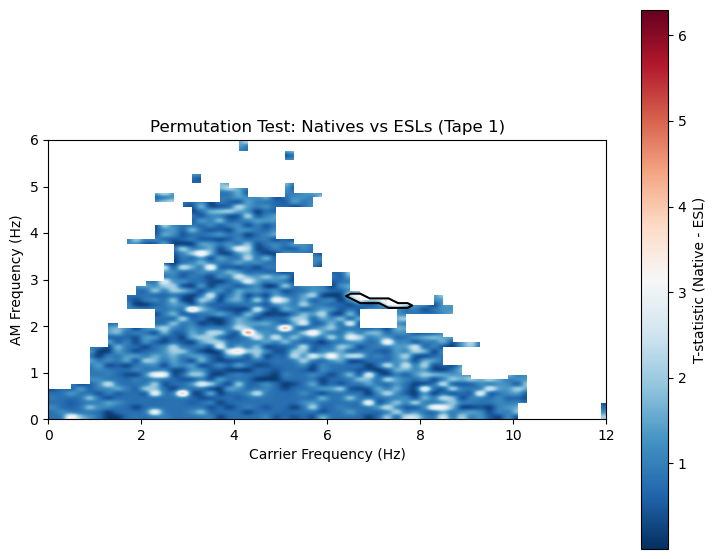

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt
from mne.stats import spatio_temporal_cluster_test

## For permutation test of both groups

# 1. Load saved data
natives = np.load(wOnset_DIR_Natives / "Natives_tape1_heatmaps.npy") # (33, 60, 60)
esls = np.load(wOnset_DIR_ESLs / "ESLs_tape1_heatmaps.npy")       # (26, 60, 60)

# 2. Format for MNE: [group1_array, group2_array]
X = [natives, esls]

# 3. Run Permutation Test
# threshold: T-value where clusters start forming (2.0 is roughly p < 0.05)
t_obs, clusters, cluster_pv, H0 = spatio_temporal_cluster_test(
    X, 
    threshold=2.0, 
    n_permutations=1000, 
    tail=0, # Two-tailed
    n_jobs=-1
)

# (OLD Codes for tuple errors)# 4. Plot Results
# plt.figure(figsize=(10, 8))
# # T-obs is (60, 60), we transpose for [Carrier, AM] plotting
# plt.imshow(t_obs.T, origin='lower', extent=[0, 12, 0, 6], cmap='RdBu_r')
# plt.colorbar(label='T-statistic')

# # Overlay Significant Clusters (p < 0.05)
# for i, p_val in enumerate(cluster_pv):
#     if p_val < 0.05:
#         # Create a boolean mask for the significant cluster
#         mask = clusters[i].astype(float)
#         plt.contour(mask.T, colors='black', levels=[0.5], extent=[0, 12, 0, 6])
#         print(f"Significant Cluster found! p-value: {p_val:.4f}")

# plt.xlabel('Carrier Frequency (Hz)')
# plt.ylabel('AM Frequency (Hz)')
# plt.title('Permutation Test: Natives vs ESLs (Tape 1)')
# plt.show()


# ==========================================
# 4. PLOT RESULTS (FIXED)
# ==========================================
plt.figure(figsize=(9, 7))
# T-obs is (60, 60), we transpose for [Carrier, AM] plotting
plt.imshow(t_obs.T, origin='lower', extent=[0, 12, 0, 6], cmap='RdBu_r', interpolation='gaussian')
plt.colorbar(label='T-statistic (Native - ESL)')

# Overlay Significant Clusters (p < 0.05)
for i, p_val in enumerate(cluster_pv):
    if p_val < 0.05:
        # --- FIX: Reconstruct the mask from the tuple of indices ---
        # 1. Create an empty boolean mask with the same shape as t_obs
        mask = np.zeros(t_obs.shape, dtype=bool) 
        
        # 2. Fill the mask using the indices in the cluster tuple
        mask[clusters[i]] = True
        
        # 3. Plot the contour of the mask
        plt.contour(mask.T, colors='black', levels=[0.5], extent=[0, 12, 0, 6])
        print(f"Significant Cluster found! p-value: {p_val:.4f}")

plt.xlabel('Carrier Frequency (Hz)')
plt.ylabel('AM Frequency (Hz)')
plt.title('Permutation Test: Natives vs ESLs (Tape 1)')
plt.show()